In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('./New_Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./New_Data/ICMRTestingDetails.csv
./New_Data/StatewiseTestingDetails.csv
./New_Data/population_india_census2011.csv
./New_Data/complete.csv
./New_Data/AgeGroupDetails.csv
./New_Data/ICMRTestingLabs.csv
./New_Data/HospitalBedsIndia.csv
./New_Data/patients_data.csv
./New_Data/IndividualDetails.csv
./New_Data/HospitalBedsIndiaLocations.csv
./New_Data/covid_19_india.csv


In [4]:
!pip install geopy

     |████████████████████████████████| 112kB 1.8MB/s eta 0:00:01


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rohith/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rohith/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
import re
from time import strptime
from datetime import datetime
import nltk
import matplotlib.pyplot as plt
# Network Science for web project
import networkx as nx

import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 
import os
import folium
from folium.plugins import FloatImage
from folium.features import DivIcon
import geopy
from  geopy.geocoders import Nominatim
import itertools
from IPython.display import clear_output
import time
import plotly.express as px
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [6]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.sem.relextract import extract_rels, rtuple
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import Tree

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/rohith/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/rohith/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
def getRelBetnPersonLoc(x):
    chunked = ne_chunk(pos_tag(word_tokenize(x)))
    pat = re.compile('.*\S.*')
    rels = extract_rels('PER', 'GPE', chunked, corpus = 'ace', pattern = pat)
    for rel in rels:
        return(rtuple(rel))

In [8]:
def get_locations(text):
    # Tokenize work, POS tag, and NER
    tokenizeText  = word_tokenize(text)
    posTagText = nltk.pos_tag(tokenizeText)
    namedEnt1= nltk.ne_chunk(posTagText)
    #namedEnt1.draw()
    namedEnt2 = []
    for i in namedEnt1:
        if hasattr(i, 'label'):
            NE_Name = ' '.join(x[0] for x in i.leaves())
            NE_Type = i.label()
            namedEnt2.append([NE_Name, NE_Type]) 
    #display(namedEnt2)
    tmp = list(filter(lambda x:x[1]=='GPE',namedEnt2))
    countries = []
    for i in range(len(tmp)):
        countries.append(tmp[i][0])
    return countries 


In [9]:
def fun1(x):
    return datetime.strptime(x, '%d-%b-%y').date().strftime("%d-%b-%Y")

def fun2(x):
    return datetime.strptime(x, '%m/%d/%Y').date().strftime("%d-%m-%Y") 

def fun3(x):
    tmp = ''.join(map(str, x))
    return tmp

def fun4(x):
    tmp = re.findall(r'CP\d+',x)
    return (", ".join(tmp))

In [10]:
input_data_chunk = pd.read_csv("./New_Data/individualdetails.csv", chunksize=100, iterator=True, skipinitialspace=True, index_col=False)  
input_data = pd.concat(input_data_chunk, ignore_index=True)
input_data = input_data[['Unique id', 'Diagnosed date', 'Age', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes', 'Contacts' ]]
display("Input data shape", input_data.shape)
display("Input data head", input_data.head())

'Input data shape'

(544, 11)

'Input data head'

,Unique id,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,Contacts
0,1,30-Jan-20,20.0,Female,Kerala,Thrissur,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
1,2,2-Feb-20,NaN,Unknown,Kerala,Alappuzha,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
2,3,3-Feb-20,NaN,Unknown,Kerala,Kasaragod,India,Recovered,2/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
3,4,2-Mar-20,45.0,Male,Delhi,East Delhi,India,Recovered,3/15/2020,"Travelled from Austria, Italy.\nTravel history...","Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,2-Mar-20,NaN,Unknown,Telangana,Hyderabad,India,Recovered,3/2/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN


In [11]:
input_data[['Unique id', 'Diagnosed date', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes', 'Contacts']] = input_data[['Unique id', 'Diagnosed date', 'Gender', 'Detected state', 'Detected district', 'Nationality', 'Current status', 'Status change date', 'Notes',  'Contacts']].astype(str)
input_data[['Age']] = input_data[['Age']].apply(pd.to_numeric)
input_data = input_data.dropna(how='any')
input_data = input_data.drop(input_data[input_data.Contacts == 'nan'].index)

In [14]:
# input_data.head()
input_data['Diagnosed date'] = input_data['Diagnosed date'].apply(fun1)
input_data['Diagnosed date'] =  pd.to_datetime(input_data['Diagnosed date'], format="%d-%b-%Y")
display("Input data head", input_data.head())

'Input data head'

,Unique id,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,Contacts
3,4,2020-03-02,45.0,Male,Delhi,East Delhi,India,Recovered,3/15/2020,"Travelled from Austria, Italy.\nTravel history...","Patient 22:, Patient 23:, Patient 24:, Patient..."
5,6,2020-03-03,69.0,Male,Rajasthan,Jaipur,Italy,Recovered,3/3/2020,Travelled from Italy.\nItalian tourist,"Patient 7:, Patient 8:, Patient 9:, Patient 10..."
6,7,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:
7,8,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:
8,9,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,3/4/2020,Travelled from Italy.\nItalian tourist,Patient 6:


In [15]:
input_data['Status change date'] = input_data['Status change date'].apply(fun2)
input_data['Status change date'] =  pd.to_datetime(input_data['Status change date'], format="%d-%m-%Y")

In [16]:
input_data['DiagDate-StatusChDate'] = input_data['Status change date'] - input_data['Diagnosed date']
input_data['Contacts'] = input_data['Contacts'].str.replace('Patient ', 'CP') 

In [17]:
# Create separate columns for contacted patients using the Contacts column
input_data_expanded = input_data.join(input_data['Contacts'].str.split(',', expand=True).add_prefix('Contacts').fillna(np.nan))
input_data_expanded = input_data_expanded.drop('Contacts', 1)

In [18]:
input_data_expanded.rename(columns={'Unique id': 'PatientID'}, inplace=True)
input_data_expanded['PatientID'] = 'P' + input_data_expanded['PatientID'].astype(str)

In [25]:
input_data_expanded['travelledFrom'] = input_data_expanded['Notes'].apply(get_locations)

In [26]:
input_data_expanded.head()

,PatientID,Diagnosed date,Age,Gender,Detected state,Detected district,Nationality,Current status,Status change date,Notes,DiagDate-StatusChDate,Contacts0,Contacts1,Contacts2,Contacts3,Contacts4,Contacts5,Contacts6,Contacts7,Contacts8,Contacts9,Contacts10,Contacts11,Contacts12,Contacts13,Contacts14,Contacts15,travelledFrom
3,P4,2020-03-02,45.0,Male,Delhi,East Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",13 days,CP22:,CP23:,CP24:,CP25:,CP26:,CP27:,CP47:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Austria, Italy, Italy]"
5,P6,2020-03-03,69.0,Male,Rajasthan,Jaipur,Italy,Recovered,2020-03-03,Travelled from Italy.\nItalian tourist,0 days,CP7:,CP8:,CP9:,CP10:,CP11:,CP12:,CP13:,CP14:,CP15:,CP16:,CP17:,CP18:,CP19:,CP20:,CP21:,CP28:,"[Italy, Italian]"
6,P7,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"
7,P8,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"
8,P9,2020-03-04,55.0,Unknown,Haryana,Gurugram,Italy,Hospitalized,2020-03-04,Travelled from Italy.\nItalian tourist,0 days,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Italy, Italian]"


In [27]:
input_data_expanded['travelledFrom'] = input_data_expanded['travelledFrom'].apply(fun3)
input_data_expanded = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts0', 'Contacts1', 'Contacts2', 'Contacts3', 'Contacts4', 'Contacts5', 'Contacts6', 'Contacts7', 'Contacts8', 'Contacts9', 'Contacts10', 'Contacts11', 'Contacts12', 'Contacts13', 'Contacts14', 'Contacts15']]

In [28]:
input_data_expanded.head()

,travelledFrom,PatientID,Contacts0,Contacts1,Contacts2,Contacts3,Contacts4,Contacts5,Contacts6,Contacts7,Contacts8,Contacts9,Contacts10,Contacts11,Contacts12,Contacts13,Contacts14,Contacts15
3,AustriaItalyItaly,P4,CP22:,CP23:,CP24:,CP25:,CP26:,CP27:,CP47:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ItalyItalian,P6,CP7:,CP8:,CP9:,CP10:,CP11:,CP12:,CP13:,CP14:,CP15:,CP16:,CP17:,CP18:,CP19:,CP20:,CP21:,CP28:
6,ItalyItalian,P7,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ItalyItalian,P8,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ItalyItalian,P9,CP6:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Create edgelist for network
tmp = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts0']]

tmp1 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts1']]
tmp1.columns = tmp.columns
tmp1 = pd.concat([tmp, tmp1],  axis=0, ignore_index=True)

tmp2 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts2']]
tmp2.columns = tmp.columns
tmp2 = pd.concat([tmp1, tmp2],  axis=0, ignore_index=True)

tmp3 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts3']]
tmp3.columns = tmp.columns
tmp3 = pd.concat([tmp2, tmp3],  axis=0, ignore_index=True)

tmp4 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts4']]
tmp4.columns = tmp.columns
tmp4 = pd.concat([tmp3, tmp4],  axis=0, ignore_index=True)

tmp5 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts5']]
tmp5.columns = tmp.columns
tmp5 = pd.concat([tmp4, tmp5],  axis=0, ignore_index=True)

tmp6 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts6']]
tmp6.columns = tmp.columns
tmp6 = pd.concat([tmp5, tmp6],  axis=0, ignore_index=True)

tmp7 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts7']]
tmp7.columns = tmp.columns
tmp7 = pd.concat([tmp6, tmp7],  axis=0, ignore_index=True)

tmp8 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts8']]
tmp8.columns = tmp.columns
tmp8 = pd.concat([tmp7, tmp8],  axis=0, ignore_index=True)

tmp9 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts9']]
tmp9.columns = tmp.columns
tmp9 = pd.concat([tmp8, tmp9],  axis=0, ignore_index=True)

tmp10 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts10']]
tmp10.columns = tmp.columns
tmp10 = pd.concat([tmp9, tmp10],  axis=0, ignore_index=True)

tmp11 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts11']]
tmp11.columns = tmp.columns
tmp11 = pd.concat([tmp10, tmp11],  axis=0, ignore_index=True)

tmp12 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts12']]
tmp12.columns = tmp.columns
tmp12 = pd.concat([tmp11, tmp12],  axis=0, ignore_index=True)

tmp13 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts13']]
tmp13.columns = tmp.columns
tmp13 = pd.concat([tmp12, tmp13],  axis=0, ignore_index=True)

tmp14 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts14']]
tmp14.columns = tmp.columns
tmp14 = pd.concat([tmp13, tmp14],  axis=0, ignore_index=True)

tmp15 = input_data_expanded[['travelledFrom', 'PatientID', 'Contacts15']]
tmp15.columns = tmp.columns
tmp15 = pd.concat([tmp14, tmp15],  axis=0, ignore_index=True)

In [30]:
edgelist = tmp15[pd.notnull(tmp15['Contacts0'])]
edgelist = edgelist.replace(r'^\s*$', 'NA', regex=True)

In [31]:
edgelist

,travelledFrom,PatientID,Contacts0
0,AustriaItalyItaly,P4,CP22:
1,ItalyItalian,P6,CP7:
2,ItalyItalian,P7,CP6:
3,ItalyItalian,P8,CP6:
4,ItalyItalian,P9,CP6:
5,ItalyItalian,P10,CP6:
6,ItalyItalian,P11,CP6:
7,ItalyItalian,P12,CP6:
8,ItalyItalian,P13,CP6:
9,ItalyItalian,P14,CP6:


In [32]:
edgelist = edgelist.groupby(['PatientID','Contacts0', 'travelledFrom']).size().reset_index(name='weight')

In [33]:
edgelist['Contacts0'] = edgelist['Contacts0'].apply(fun4)

In [34]:
display("Processed data with edgelist of Patients and their Contact Patients", edgelist.head())

'Processed data with edgelist of Patients and their Contact Patients'

,PatientID,Contacts0,travelledFrom,weight
0,P10,CP6,ItalyItalian,1
1,P11,CP6,ItalyItalian,1
2,P116,CP74,NA,1
3,P12,CP6,ItalyItalian,1
4,P122,CP95,SpouseP95,1


In [35]:
# Plot network of patients and their contacts
plt.figure(figsize=(15,15)) 
G = nx.Graph()
G = nx.from_pandas_edgelist(edgelist, 'PatientID', 'Contacts0', edge_attr = True)

<Figure size 1080x1080 with 0 Axes>

In [36]:
list(G.edges) 

[('P10', 'CP6'),
 ('CP6', 'P11'),
 ('CP6', 'P12'),
 ('CP6', 'P13'),
 ('CP6', 'P14'),
 ('CP6', 'P15'),
 ('CP6', 'P16'),
 ('CP6', 'P17'),
 ('CP6', 'P18'),
 ('CP6', 'P19'),
 ('CP6', 'P20'),
 ('CP6', 'P21'),
 ('CP6', 'P7'),
 ('CP6', 'P8'),
 ('CP6', 'P9'),
 ('P116', 'CP74'),
 ('CP74', 'P137'),
 ('P122', 'CP95'),
 ('CP95', 'P123'),
 ('P137', 'CP296'),
 ('P138', 'CP155'),
 ('P141', 'CP436'),
 ('P148', 'CP81'),
 ('P150', 'CP530'),
 ('P153', 'CP170'),
 ('P155', 'CP138'),
 ('P157', 'CP207'),
 ('P160', 'CP162'),
 ('P160', 'CP161'),
 ('P161', 'CP160'),
 ('CP160', 'P162'),
 ('P172', 'CP225'),
 ('P172', 'CP226'),
 ('P172', 'CP268'),
 ('P172', 'CP287'),
 ('P172', 'CP335'),
 ('P172', 'CP224'),
 ('CP225', 'P437'),
 ('P182', 'CP305'),
 ('P182', 'CP306'),
 ('P182', 'CP307'),
 ('P182', 'CP308'),
 ('P182', 'CP309'),
 ('P182', 'CP311'),
 ('P182', 'CP358'),
 ('P182', 'CP359'),
 ('P182', 'CP360'),
 ('P182', 'CP361'),
 ('P182', 'CP388'),
 ('P182', 'CP488'),
 ('P182', 'CP535'),
 ('P182', 'CP536'),
 ('P182', 'CP

In [37]:
list(G.nodes)

['P10',
 'CP6',
 'P11',
 'P116',
 'CP74',
 'P12',
 'P122',
 'CP95',
 'P123',
 'P13',
 'P137',
 'CP296',
 'P138',
 'CP155',
 'P14',
 'P141',
 'CP436',
 'P148',
 'CP81',
 'P15',
 'P150',
 'CP530',
 'P153',
 'CP170',
 'P155',
 'CP138',
 'P157',
 'CP207',
 'P16',
 'P160',
 'CP162',
 'CP161',
 'P161',
 'CP160',
 'P162',
 'P17',
 'P172',
 'CP225',
 'CP226',
 'CP268',
 'CP287',
 'CP335',
 'CP224',
 'P18',
 'P182',
 'CP305',
 'CP306',
 'CP307',
 'CP308',
 'CP309',
 'CP311',
 'CP358',
 'CP359',
 'CP360',
 'CP361',
 'CP388',
 'CP488',
 'CP535',
 'CP536',
 'CP537',
 'CP304',
 'P19',
 'P196',
 'CP397',
 'P20',
 'P200',
 'CP392',
 'CP393',
 'CP391',
 'P201',
 'CP267',
 'P207',
 'CP157',
 'P21',
 'P213',
 'CP142',
 'P214',
 'P215',
 'P244',
 'CP117',
 'P248',
 'CP250',
 'CP249',
 'P249',
 'CP248',
 'P250',
 'P267',
 'CP201',
 'P268',
 'CP172',
 'P272',
 'CP344',
 'CP345',
 'CP346',
 'CP343',
 'P285',
 'CP516',
 'CP382',
 'P287',
 'P29',
 'CP40',
 'P296',
 'CP137',
 'P297',
 'CP473',
 'P299',
 'CP191

In [38]:
list(G.adj['P6'])

['CP10',
 'CP11',
 'CP12',
 'CP13',
 'CP14',
 'CP15',
 'CP16',
 'CP17',
 'CP18',
 'CP19',
 'CP20',
 'CP21',
 'CP28',
 'CP8',
 'CP9',
 'CP7']

In [39]:
G.degree['P6']

16

In [40]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

In [41]:
tmp = [(n, d) for n, d in G.degree()]
display("Top 10 patients and their degrees", sorted(tmp, key=lambda element: (element[1], element[0]), reverse=True)[:11])

'Top 10 patients and their degrees'

[('P6', 16),
 ('P182', 16),
 ('CP6', 15),
 ('CP182', 8),
 ('P4', 7),
 ('P37', 7),
 ('P36', 7),
 ('P35', 6),
 ('P172', 6),
 ('P38', 5),
 ('P272', 4)]

In [42]:
PatientIDs = list(edgelist.PatientID.unique())
contacts = list(edgelist.Contacts0.unique())

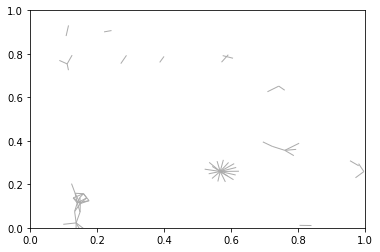

In [44]:
layout = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

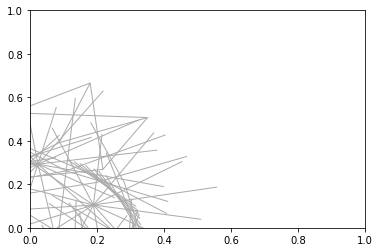

In [45]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

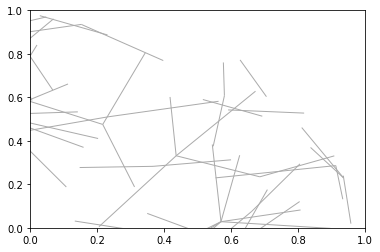

In [43]:
layout = nx.fruchterman_reingold_layout(G,
                                        k=.5,
                                        pos=None,
                                        fixed=None,
                                        iterations=100,
                                        #threshold=1e-4,
                                        weight='weight',
                                        scale=1,
                                        center=None,
                                        dim=2,
                                        seed=None)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

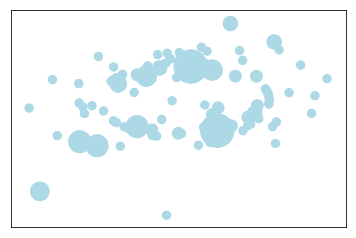

In [46]:
PatientIDs = [node for node in G.nodes() if node in edgelist.PatientID.unique()]
size = [G.degree(node) * 70 for node in G.nodes() if node in edgelist.PatientID.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=PatientIDs, node_size=size, node_color='lightblue')

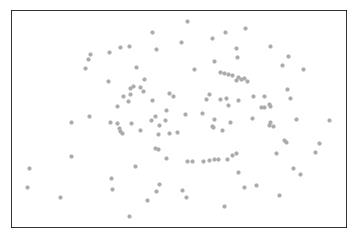

In [47]:
contacts = [node for node in G.nodes() if node in edgelist.Contacts0.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=contacts, node_size=10, node_color='#ABABAB')

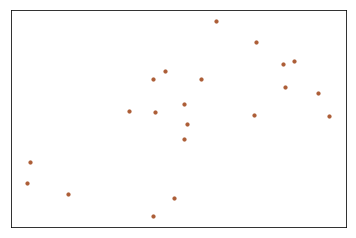

In [48]:
high_degree_Patient0 = [node for node in G.nodes() if node in edgelist.Contacts0.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, pos=layout, nodelist=high_degree_Patient0, node_size=10, node_color='#ac5d36')

{'CP6': Text(0.189158,0.10481,'CP6'),
 'CP74': Text(0.340411,-0.0813221,'CP74'),
 'CP95': Text(0.301435,0.0612968,'CP95'),
 'CP296': Text(0.180659,0.484976,'CP296'),
 'CP155': Text(0.226688,0.242019,'CP155'),
 'CP436': Text(0.205006,0.260602,'CP436'),
 'CP81': Text(0.189689,0.271942,'CP81'),
 'CP530': Text(0.165585,0.28723,'CP530'),
 'CP170': Text(0.148812,0.29626,'CP170'),
 'CP138': Text(0.131532,0.304332,'CP138'),
 'CP207': Text(0.113818,0.311394,'CP207'),
 'CP162': Text(0.468491,0.32838,'CP162'),
 'CP161': Text(-0.0870285,0.137985,'CP161'),
 'CP160': Text(0.179728,0.249568,'CP160'),
 'CP225': Text(0.0796564,-0.0798398,'CP225'),
 'CP226': Text(0.412535,0.120658,'CP226'),
 'CP268': Text(0.404751,0.427448,'CP268'),
 'CP287': Text(0.135246,0.597637,'CP287'),
 'CP335': Text(-0.158255,0.473563,'CP335'),
 'CP224': Text(-0.216149,0.172261,'CP224'),
 'CP305': Text(0.0822718,-0.0891502,'CP305'),
 'CP306': Text(0.251624,-0.0199042,'CP306'),
 'CP307': Text(0.253128,0.137724,'CP307'),
 'CP308': 

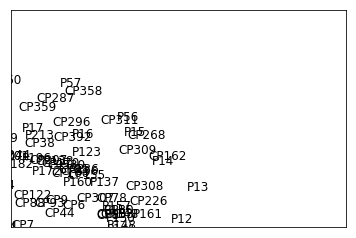

In [49]:
PatientIDs_dict = dict(zip(PatientIDs, PatientIDs))
nx.draw_networkx_labels(G, pos=layout, labels=PatientIDs_dict)
contactsIDs_dict = dict(zip(contacts, contacts))
nx.draw_networkx_labels(G, pos=layout, labels=contactsIDs_dict)

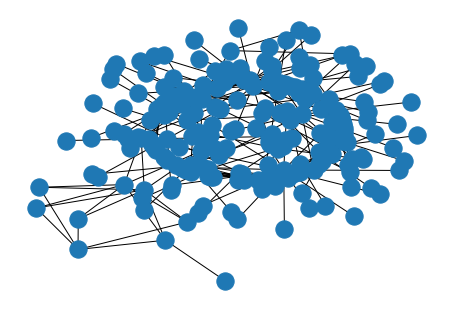

In [50]:
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=layout, edges=edges, width=weights)

{('P10', 'CP6'): Text(0.274316,-0.0419908,'ItalyItalian'),
 ('CP6', 'P11'): Text(0.343276,-0.00511565,'ItalyItalian'),
 ('CP6', 'P12'): Text(0.349961,0.0719354,'ItalyItalian'),
 ('CP6', 'P13'): Text(0.37381,0.145975,'ItalyItalian'),
 ('CP6', 'P14'): Text(0.322021,0.205033,'ItalyItalian'),
 ('CP6', 'P15'): Text(0.279705,0.271425,'ItalyItalian'),
 ('CP6', 'P16'): Text(0.20211,0.268149,'ItalyItalian'),
 ('CP6', 'P17'): Text(0.127441,0.282508,'ItalyItalian'),
 ('CP6', 'P18'): Text(0.0670371,0.231781,'ItalyItalian'),
 ('CP6', 'P19'): Text(0.0192624,0.171931,'ItalyItalian'),
 ('CP6', 'P20'): Text(-0.00445898,0.0858281,'ItalyItalian'),
 ('CP6', 'P21'): Text(0.0496641,-0.0314382,'ItalyP6ItalianP6'),
 ('CP6', 'P7'): Text(0.069951,0.0497814,'ItalyItalian'),
 ('CP6', 'P8'): Text(0.131613,-0.0645065,'ItalyItalian'),
 ('CP6', 'P9'): Text(0.208843,-0.0802791,'ItalyItalian'),
 ('P116', 'CP74'): Text(0.34815,-0.228602,'NA'),
 ('CP74', 'P137'): Text(0.310983,0.0632405,'NA'),
 ('P122', 'CP95'): Text(0.3

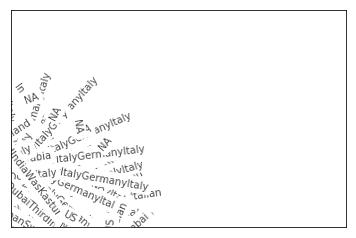

In [51]:
edgeLabels = {}  
for a, b in G.edges():
    edgeLabels[(a, b)] = str(G.get_edge_data(a, b, {"travelledFrom":0})["travelledFrom"])

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edgeLabels, font_color='black', alpha=.7) 

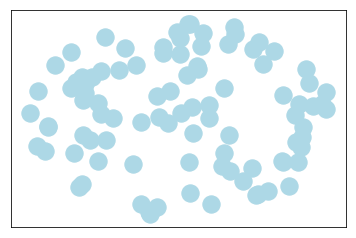

In [59]:
nx.draw_networkx_nodes(G, nodelist=PatientIDs, pos=layout, node_color='lightblue', label='P-Patient')

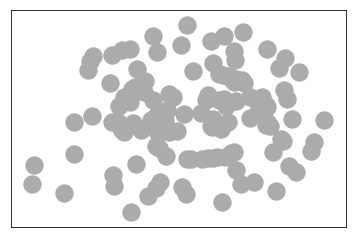

In [53]:
nx.draw_networkx_nodes(G, nodelist=contacts, pos=layout, node_color='#ABABAB', label='CP-Contact with a Patient')

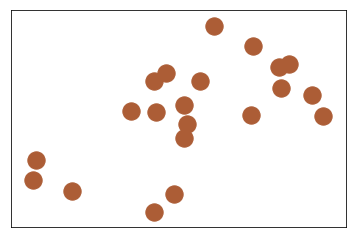

In [54]:
nx.draw_networkx_nodes(G, nodelist=high_degree_Patient0, pos=layout, node_color='#ac5d36', label='CP-Contact With More Than 1 Patient')

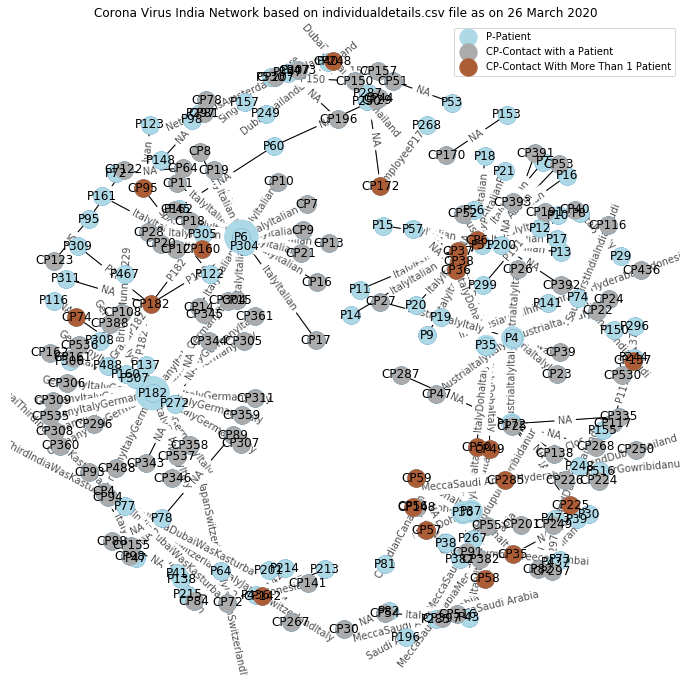

In [60]:
plt.figure(3,figsize=(12,12))
layout = nx.fruchterman_reingold_layout(G,
                                        k=.5,
                                        pos=None,
                                        fixed=None,
                                        iterations=100,
                                        #threshold=1e-4,
                                        weight='weight',
                                        scale=1,
                                        center=None,
                                        dim=2,
                                        seed=None)
nx.draw_networkx_edges(G, pos=layout, edge_color='#ABABAB')

PatientIDs = [node for node in G.nodes() if node in edgelist.PatientID.unique()]
size = [G.degree(node) * 70 for node in G.nodes() if node in edgelist.PatientID.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=PatientIDs, node_size=size, node_color='lightblue')

contacts = [node for node in G.nodes() if node in edgelist.Contacts0.unique()]
nx.draw_networkx_nodes(G, pos=layout, nodelist=contacts, node_size=10, node_color='#ABABAB')

high_degree_Patient0 = [node for node in G.nodes() if node in edgelist.Contacts0.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, pos=layout, nodelist=high_degree_Patient0, node_size=10, node_color='#ac5d36')


PatientIDs_dict = dict(zip(PatientIDs, PatientIDs))
nx.draw_networkx_labels(G, pos=layout, labels=PatientIDs_dict)
contactsIDs_dict = dict(zip(contacts, contacts))
nx.draw_networkx_labels(G, pos=layout, labels=contactsIDs_dict)

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=layout, edges=edges, width=weights)

edgeLabels = {}  
for a, b in G.edges():
    edgeLabels[(a, b)] = str(G.get_edge_data(a, b, {"travelledFrom":0})["travelledFrom"])

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edgeLabels, font_color='black', alpha=.7) 

nx.draw_networkx_nodes(G, nodelist=PatientIDs, pos=layout, node_color='lightblue', label='P-Patient')
nx.draw_networkx_nodes(G, nodelist=contacts, pos=layout, node_color='#ABABAB', label='CP-Contact with a Patient')
nx.draw_networkx_nodes(G, nodelist=high_degree_Patient0, pos=layout, node_color='#ac5d36', label='CP-Contact With More Than 1 Patient')
plt.legend(numpoints = 1)


plt.axis('off')
plt.title("Corona Virus India Network based on individualdetails.csv file as on 26 March 2020")
plt.show()

In [ ]:
# https://www.kaggle.com/debbdeb/covid19-india-network-and-map-visualization/notebook